## 175. Combine Two Tables

**Change Log**   

| Date | Description |
| ---------- | ---------- |
| 2022-04-11 | Initialize |
| 2022-04-11 | Completed solutions 1 - 4 |


## Summary
Return all from one table and matching records from related table.

Basically a simple Left Join

#### SQL Schema

```sql
Create table If Not Exists Person (personId int, firstName varchar(255), lastName varchar(255))
Create table If Not Exists Address (addressId int, personId int, city varchar(255), state varchar(255))
Truncate table Person
insert into Person (personId, lastName, firstName) values ('1', 'Wang', 'Allen')
insert into Person (personId, lastName, firstName) values ('2', 'Alice', 'Bob')
Truncate table Address
insert into Address (addressId, personId, city, state) values ('1', '2', 'New York City', 'New York')
insert into Address (addressId, personId, city, state) values ('2', '3', 'Leetcode', 'California')
```

Table: `Person`

```
+-------------+---------+   
| Column Name | Type    |   
+-------------+---------+   
| personId    | int     |   
| lastName    | varchar |   
| firstName   | varchar |   
+-------------+---------+   
```
personId is the primary key column for this table.   
This table contains information about the ID of some persons and their first and last names.

Table: `Address`

```
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| addressId   | int     |
| personId    | int     |
| city        | varchar |
| state       | varchar |
+-------------+---------+
```
addressId is the primary key column for this table.   
Each row of this table contains information about the city and state of one person with ID = PersonId.


#### Problem

Write an SQL query to report the first name, last name, city, and state of each person in the `Person` table. If the address of a `personId` is not present in the `Address` table, report `null` instead.

Return the result table in **any order**.




The query result format is in the following example.

#### Example 1:

**Input:**
```
Person table:
+----------+----------+-----------+
| personId | lastName | firstName |
+----------+----------+-----------+
| 1        | Wang     | Allen     |
| 2        | Alice    | Bob       |
+----------+----------+-----------+
Address table:
+-----------+----------+---------------+------------+
| addressId | personId | city          | state      |
+-----------+----------+---------------+------------+
| 1         | 2        | New York City | New York   |
| 2         | 3        | Leetcode      | California |
+-----------+----------+---------------+------------+
```
***Output:***
```
+-----------+----------+---------------+----------+
| firstName | lastName | city          | state    |
+-----------+----------+---------------+----------+
| Allen     | Wang     | Null          | Null     |
| Bob       | Alice    | New York City | New York |
+-----------+----------+---------------+----------+
```
**Explanation:**      
There is no address in the address table for the personId = 1 so we return null in their city and state.
addressId = 1 contains information about the address of personId = 2.

--- 

## Solution 1 - MSSQL

As stated earlier this is a very simple LEFT JOIN.  We select all records from Person table and matching records from the Address table.

```sql
SELECT  p.firstName, p.lastName, a.city, a.state
FROM    Person p
        LEFT JOIN Address a ON a.personId = p.PersonID
```

### Result

![]()

Works as expected.  The surprise is that execution (726ms) is faster than more than 90% of other submissions, with the population mean being around 900ms.  A significant number of submissions are above 1200ms. What kind of statements are they writing?

--- 

## Solution 2 - MSSQL - Add NOLOCK

As stated earlier this is a very simple LEFT JOIN.  We select all records from Person table and matching records from the Address table.

```sql
SELECT  p.firstName, p.lastName, a.city, a.state
FROM    Person p (NOLOCK)
        LEFT JOIN Address a (NOLOCK) ON a.personId = p.PersonID
```

### Result

![]()

No significant difference in execution time.  Any difference is probably due to server load.

For a dataset this small there would be no noticeable difference, but much larger datasets would normally show a noticeable difference.

In addition, adding the NOLOCK hint is a best practise if no data manipulation is being done.

---

## Solution 3 - MySQL

```mysql
# Write your MySQL query statement below
SELECT  p.firstName, p.lastName, a.city, a.state
FROM    Person p
        LEFT JOIN Address a ON a.personId = p.PersonID
;

```

### Result

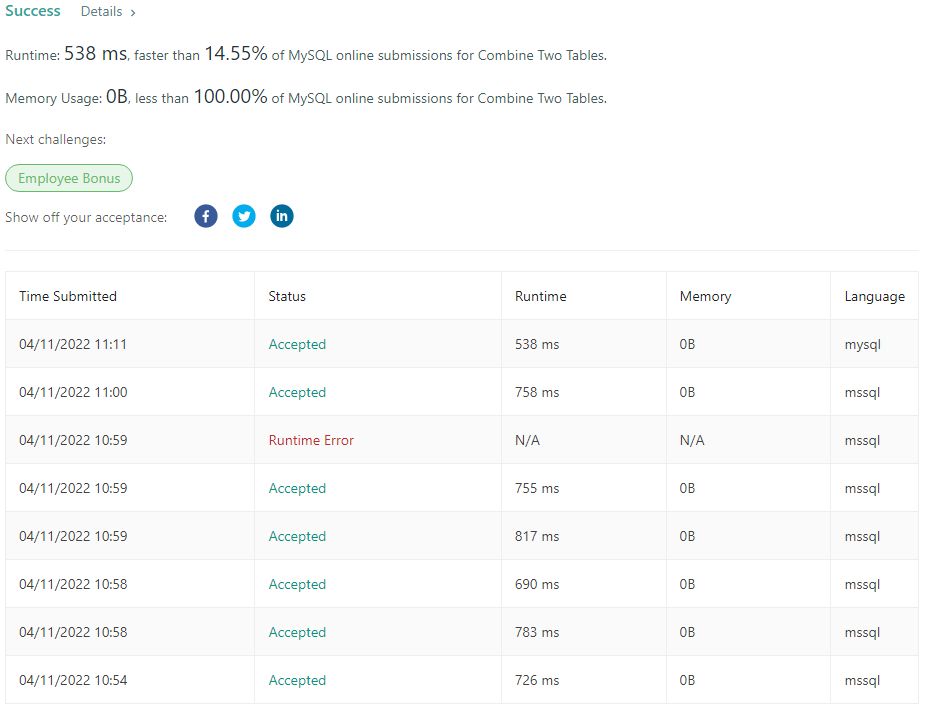


Performs better than mssql, but we rank slow vs other submissions.

---

## Solution 4 - MySQL - Explicit LEFT OUTER

```mysql
# Write your MySQL query statement below
SELECT  p.firstName, p.lastName, a.city, a.state
FROM    Person p
        LEFT OUTER JOIN Address a ON a.personId = p.PersonID
;

```

### Results

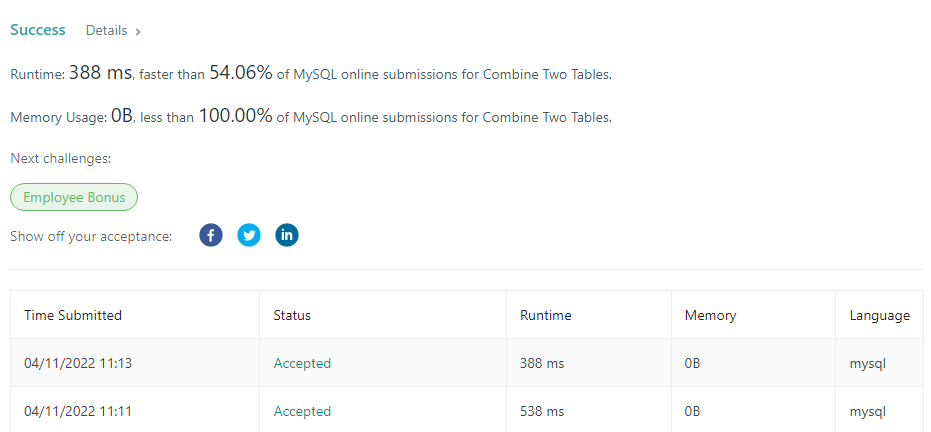

Better, we are running about average now.  Can we speed this up further?

---

## Solution 5 - MySQL - ???

Do we bother optimizing further?  Can it be optimized further?  

May come back to this later to tweak further, but for now we are done.